**Extract video fragment (Ноутбук для извлечения видео-фрагмента из видео)**

https://drive.google.com/file/d/1zlhCGJvJPOjZQ8u_gjmchO-i63ZxhxHO

## **Сервисные функции**

In [ ]:
import os
import shutil

# @title Функция удаления всех папок и файлов в directory
def delete_all_files_and_folders(directory):
    try:
        # Переход в указанную директорию
        os.chdir(directory)

        # Удаление всех файлов и папок
        for file in os.listdir():
            file_path = os.path.join(directory, file)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print(f"Failed to delete {file_path}. Reason: {e}")

        print(f"All files and folders in {directory} have been deleted.")
    except Exception as e:
        print(f"Failed to delete files and folders. Reason: {e}")


## **Предварительные действия**

In [ ]:
!nvidia-smi


Thu Dec 28 16:11:54 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# @title Удаление всех папок и файлов в root_path
delete_all_files_and_folders(HOME)


All files and folders in /content have been deleted.


## **Установка YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

import glob
from IPython.display import display, Image

import shutil
import os

## **Обнаружение объектов**

In [ ]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
import datetime

# @title Определение путей для использования лучшей модели best.pt с Google Disk
# Базовый путь, где хранится модель и др.
base_path = '/content/drive/MyDrive/Intership_03/YOLOv8_trained/'

last_best_path = f"{base_path}Last_Best/"

test_predict_path = f"{base_path}1Detection/178.31.03.2023/Fragment_Original/"
output_path = f"{base_path}1Detection/178.31.03.2023/Fragment_Predict/"

print(f'Путь, где сохранена модель: {last_best_path}')


Путь, где сохранена модель: /content/drive/MyDrive/Intership_03/YOLOv8_trained/Last_Best/


In [ ]:
# @title Обнаружение объектов (detection), используя сохранённую лучшую модель best.pt

min_conf = 0.5

!yolo task=detect mode=predict model={last_best_path}best.pt source='{test_predict_path}' conf={min_conf} save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/1750) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Detection/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 6 crane-towers, 183.2ms
video 1/1 (2/1750) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Detection/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 6 crane-towers, 25.2ms
video 1/1 (3/1750) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Detection/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 6 crane-towers, 27.2ms
video 1/1 (4/1750) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Detection/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 6 crane-towers, 1 truck, 59.0ms
video 1/1 (5/1750) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Detection/178.31.03.2023/Fragment_Original/vide

In [ ]:
# Исходный путь
source_folder = f'{HOME}/runs/detect/predict/'
output_path = f"{output_path}predict/"
print(f'output_path: {output_path}')

# @title Копирование папки predict в папку output_path

# Создаем целевую директорию, если она еще не существует
os.makedirs(output_path, exist_ok=True)

# Копирование файлов из source_folder в output_path
for file_name in os.listdir(source_folder):
    source_file = os.path.join(source_folder, file_name)
    destination_file = os.path.join(output_path, file_name)
    shutil.copy2(source_file, destination_file)


output_path: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Detection/178.31.03.2023/Fragment_Predict/predict/predict/predict/


## **Вывод:**

**Качество обнаружения строительной техники на видео НЕ удовлетворительно**

**P.S.:**

Из-за того, что размеченная база не очень большая, т.е. всего 200 изображений, и классы не сбалансированы, наблюдается, что некоторые классы распознаются не стабильно. Если же в классе достаточно размеченных объектов для обучения, то классы распознаются стабильно.

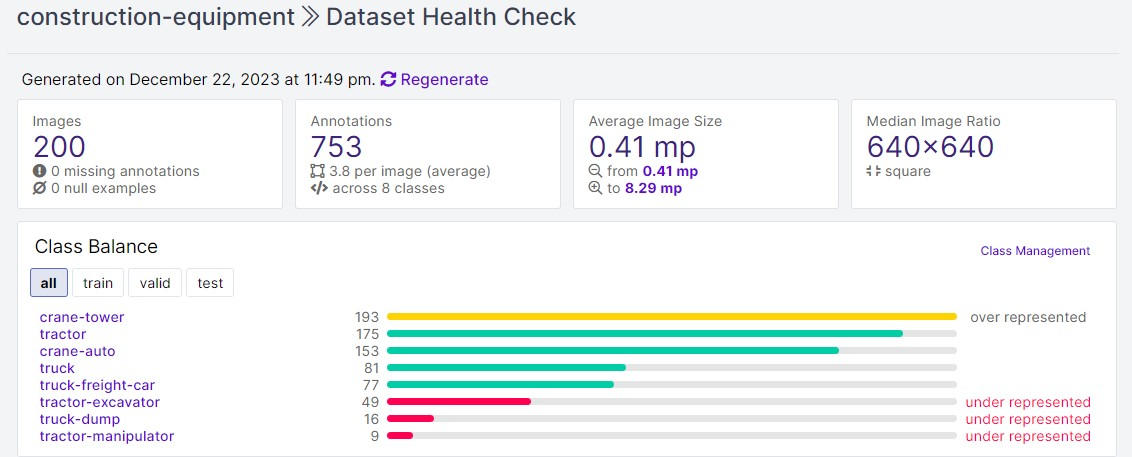

В данном видео 178.31.03.2023 удовлетворительно распознаётся только класс "crane-tower".

Остальные классы распознаются не удовлетворительно, т.е. то распознаются, то НЕ распознаются. Много ошибок.

Явно не хватает базы. Нужно её расширять и дополнять. Затем до-обучать модель на расширенной базе.

## **Ссылки на Results от YOLOv8**

[FREE - HDconvert.com] video_fragment_predicted.mp4 (37.6 Мб битрейт 4376 кбит/сек)

https://drive.google.com/file/d/1VLfTmJA4I0hdIV1w8Pp3vuXghlfkLMhB

## **Ссылка на до-обученную модель yolov8m.pt**

 **best.pt (YOLOv8)**

https://drive.google.com/file/d/1-nfX9ZuysvfjxxurufWid24J7pPxx4VT